# Feature Transformation
### Outlier Detection
<pre>
    1. Z-score treatment (in case of Normal or almost normal ditribution)
    2. IQR Based filtering (in csae of skewed distribution)
    3. Percentile
    4. Winsorization
</pre>

# 1. Z-score treatment
1. Z-score treatment<br>
    Z-score = (value - average) / Standard Deviation<br>
    Outlier = Any value with an absolute z-score greater than 3<br>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
placement_data = pd.read_csv("A:\\py-code\\1 ML\\Feature-Engineering\\placement.csv")
placement_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


### Pandas KDE Plot

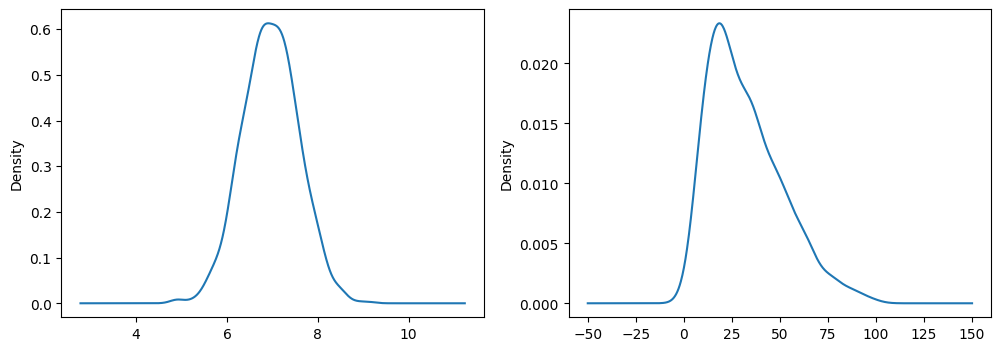

In [19]:
# Step1: Plot the distributions
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
placement_data['cgpa'].plot(kind='kde',ax=ax1,xlabel='CGPA')
placement_data['placement_exam_marks'].plot(kind='kde',ax=ax2,xlabel="Placement Exam Marks")
plt.show() # Optional, but good practice

### Seaborn's KDE Plot

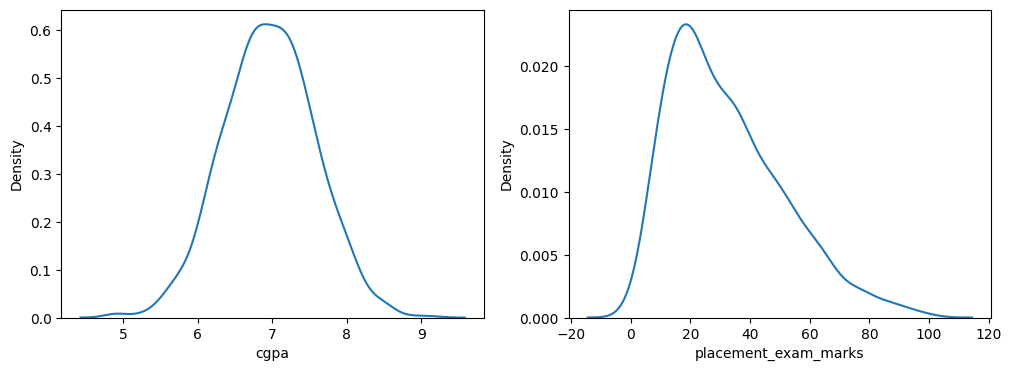

In [18]:
# using seaborn for better visual
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
sns.kdeplot(data=placement_data,x='cgpa',ax=ax1)
sns.kdeplot(data=placement_data,x='placement_exam_marks',ax=ax2)
plt.show()

### Seaborn't distplot (going to be deprecated)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_11224\1452018963.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_data['cgpa'],ax=ax1)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_11224\1452018963.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_data['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

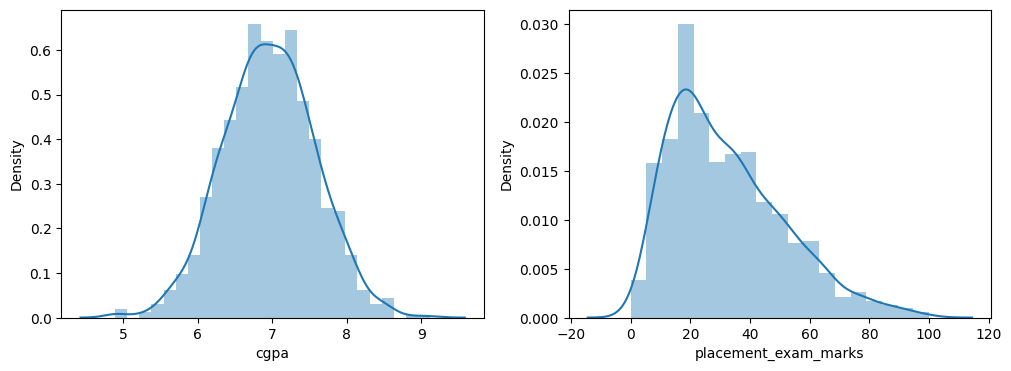

In [24]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.distplot(placement_data['cgpa'],ax=ax1)
sns.distplot(placement_data['placement_exam_marks'])

### Seaborn's histplot with kde=True

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

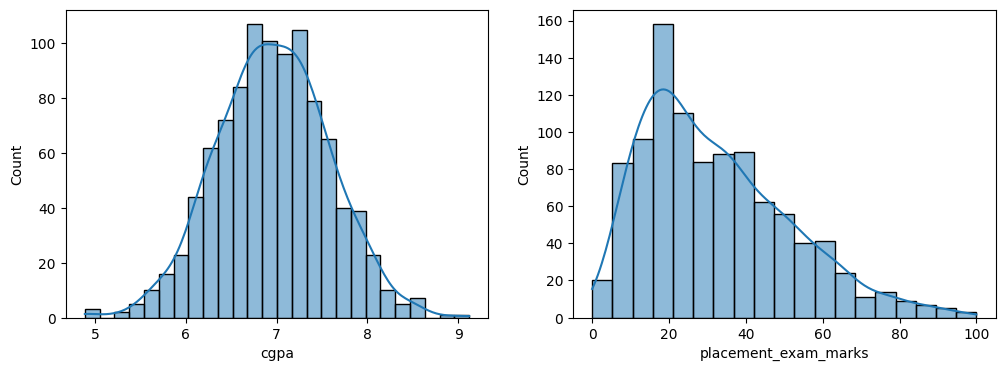

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax1)
sns.histplot(data=placement_data, x='placement_exam_marks',kde=True,ax=ax2)

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

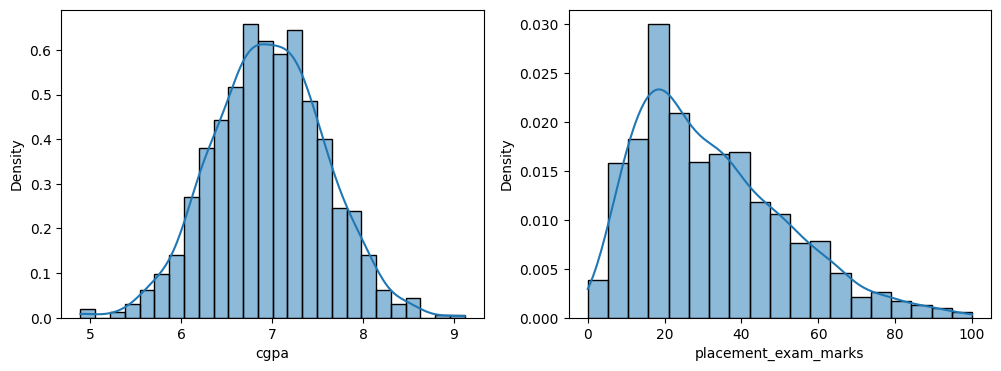

In [33]:
# Have a look on Y-axis
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax1,stat='density')
sns.histplot(data=placement_data, x='placement_exam_marks',kde=True,ax=ax2,stat='density')

<Axes: xlabel='cgpa', ylabel='Density'>

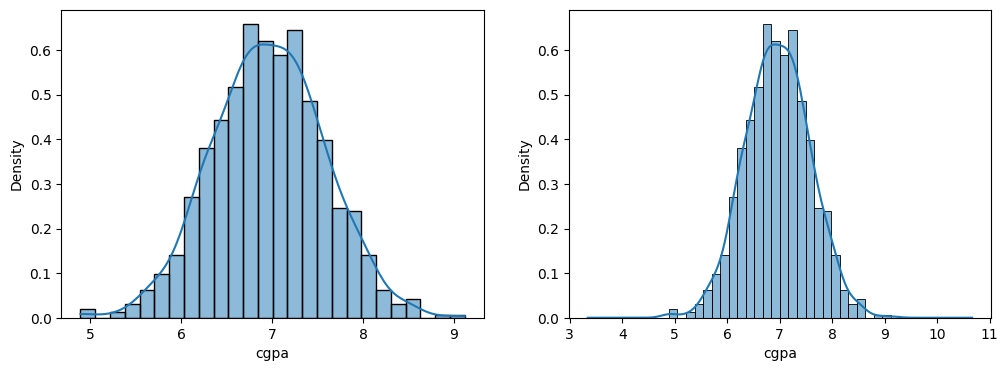

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax1,stat='density')
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax2,stat='density',kde_kws=dict(cut=10)) #make it thin

<Axes: xlabel='cgpa', ylabel='Density'>

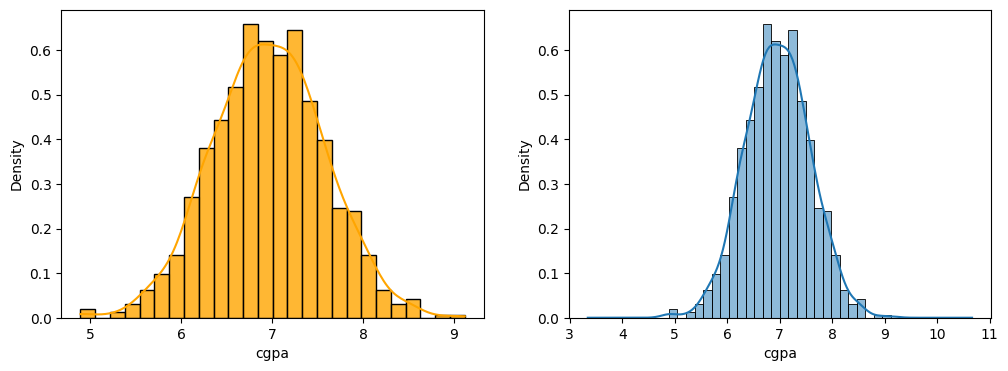

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax1,stat='density',alpha=.8,color='#FFA500')
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax2,stat='density',kde_kws=dict(cut=10)) #make it thin

CGPA Distribution is normal so we can apply the Z-score treatment.